In [1]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [2]:
data = pd.read_csv("/mnt/g/onlinelessons/deep learning/dataset/bike-sharing-demand/bike_sharing.csv", index_col=0)

In [3]:
data.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
619,11-09-2019,3,1,9,0,2,1,1,23.677500,27.71460,52.0000,6.167631,1070,6697,7767
76,17-03-2018,1,0,3,0,4,1,1,17.015000,20.51665,60.2917,14.041793,424,2320,2744
430,06-03-2019,1,1,3,0,2,1,1,10.591653,12.75210,45.6667,13.458625,221,3735,3956
18,18-01-2018,1,0,1,0,2,1,2,8.883347,11.61665,86.1667,9.833925,9,674,683
351,17-12-2018,4,0,12,0,6,0,2,10.591653,12.46855,56.0833,16.292189,275,2464,2739


In [4]:
data.shape

(730, 15)

Text(0.5, 1.0, 'number of bikes rented per season')

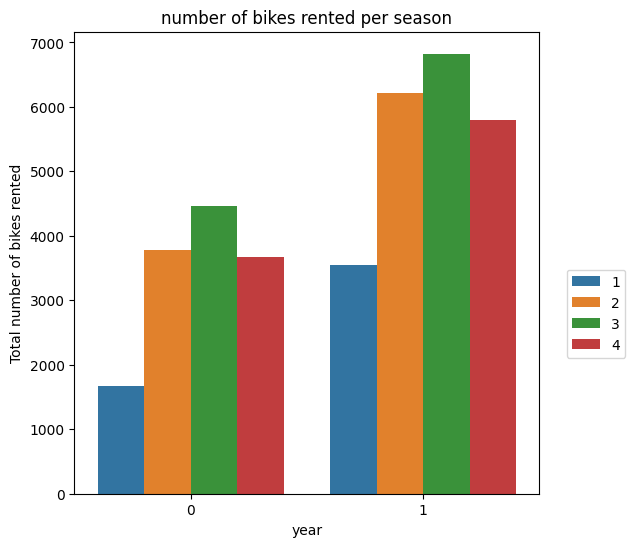

In [5]:
plt.figure(figsize=(6,6))
sns.barplot(x='yr', y='cnt', hue='season', data=data, errorbar=None)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
            
plt.xlabel('year') 
plt.ylabel("Total number of bikes rented")
            
plt.title("number of bikes rented per season")

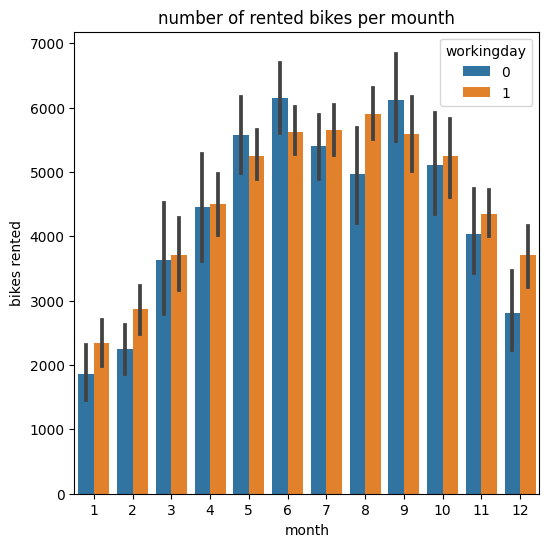

In [6]:
plt.figure(figsize=(6,6))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=data)

plt.xlabel('month')
plt.ylabel('bikes rented')
plt.title("number of rented bikes per mounth")

plt.show()

Text(0.5, 1.0, 'Effect of temperature on rented bikes')

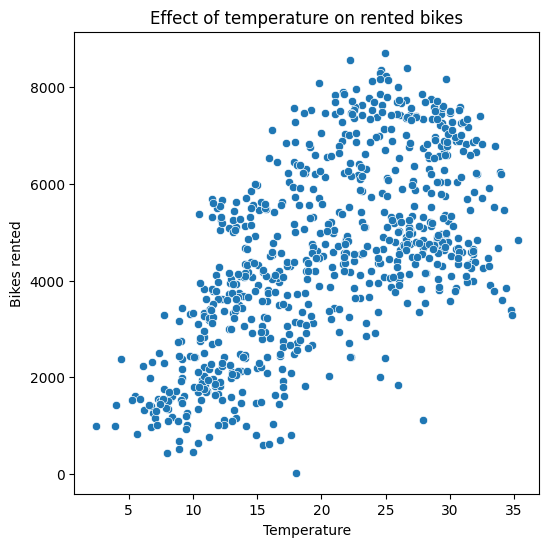

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='temp', y='cnt', data=data)

plt.xlabel("Temperature")
plt.ylabel("Bikes rented")

plt.title("Effect of temperature on rented bikes")

In [8]:
data = pd.get_dummies(data, columns=['season'])
data.sample(5)

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,
358,24-12-2018,0,12,0,6,0,1,12.402500,14.96210,54.2500,12.750368,155,856,1011,1,0,0,0
522,06-06-2019,1,6,0,3,1,1,22.720847,27.11460,61.1250,5.167375,1027,6028,7055,0,1,0,0
531,15-06-2019,1,6,0,5,1,1,26.205847,29.98770,58.9583,11.833339,1563,6102,7665,0,1,0,0
260,17-09-2018,0,9,0,6,0,2,20.158347,23.92560,71.8333,12.708225,1434,3077,4511,0,0,1,0
93,03-04-2018,0,4,0,0,0,1,15.511653,18.93835,48.0000,12.208271,1651,1598,3249,0,1,0,0


In [9]:
feature_columns=['registered', 'holiday', 'weekday',
                 'weathersit', 'temp', 'atemp',
                 'season_1', 'season_2', 'season_3',
                 'season_4']
features = data[feature_columns]
target = data[['cnt']]
target

,cnt
instant,
1,985
2,801
3,1349
4,1562
5,1600
...,...
726,2114
727,3095
728,1341


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
                                                    

In [12]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [13]:
X_train_tensor.shape

torch.Size([584, 10])

In [14]:
y_test_tensor.shape

torch.Size([146, 1])

In [15]:
import torch.utils.data as data_utils

In [16]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [17]:
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [18]:
len(train_loader)

6

In [19]:
features_batch, targets_batch = next(iter(train_loader))

In [20]:
features_batch.shape

torch.Size([100, 10])

In [21]:
targets_batch.shape

torch.Size([100, 1])

In [22]:
input_size = X_train_tensor.shape[1]
output_size = 1
hidden_layer_size = 10

In [23]:
loss_fn = torch.nn.MSELoss()

In [24]:
model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_layer_size),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p=0.2),
                            torch.nn.Linear(hidden_layer_size, output_size))

/home/ghostoftime111/anaconda3/envs/DP/lib/python3.10/site-packages/torch/onnx/symbolic_helper.py:1457: UserWarning: ONNX export mode is set to TrainingMode.EVAL, but operator 'dropout' is set to train=True. Exporting with train=True.
  warnings.warn(
/home/ghostoftime111/anaconda3/envs/DP/lib/python3.10/site-packages/hiddenlayer/pytorch_builder.py:82: FutureWarning: 'torch.onnx._patch_torch._node_getitem' is deprecated in version 1.13 and will be removed in version 1.14. Please Internally use '_node_get' in symbolic_helper instead..
  params = {k: torch_node[k] for k in torch_node.attributeNames()}


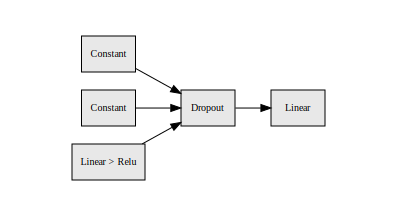

In [25]:
hl.build_graph(model, torch.zeros([hidden_layer_size, input_size])).build_dot()

In [26]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 2000 == 0:
            print(f"Epoch [{epoch + 1}]/[{epoch}], Step: {i+1}/{total_step}, Loss: {loss.item():.4f}") 
            

Epoch [1]/[0], Step: 1/6, Loss: 23660508.0000
Epoch [1]/[0], Step: 2/6, Loss: 28215488.0000
Epoch [1]/[0], Step: 3/6, Loss: 24479944.0000
Epoch [1]/[0], Step: 4/6, Loss: 24987310.0000
Epoch [1]/[0], Step: 5/6, Loss: 24385480.0000
Epoch [1]/[0], Step: 6/6, Loss: 23785826.0000
Epoch [2001]/[2000], Step: 1/6, Loss: 1767124.7500
Epoch [2001]/[2000], Step: 2/6, Loss: 1952407.6250
Epoch [2001]/[2000], Step: 3/6, Loss: 1856343.3750
Epoch [2001]/[2000], Step: 4/6, Loss: 2348398.5000
Epoch [2001]/[2000], Step: 5/6, Loss: 2161101.0000
Epoch [2001]/[2000], Step: 6/6, Loss: 1913115.7500
Epoch [4001]/[4000], Step: 1/6, Loss: 1531450.3750
Epoch [4001]/[4000], Step: 2/6, Loss: 1485061.0000
Epoch [4001]/[4000], Step: 3/6, Loss: 1712696.6250
Epoch [4001]/[4000], Step: 4/6, Loss: 2187713.5000
Epoch [4001]/[4000], Step: 5/6, Loss: 2567527.0000
Epoch [4001]/[4000], Step: 6/6, Loss: 2436605.5000
Epoch [6001]/[6000], Step: 1/6, Loss: 2437431.5000
Epoch [6001]/[6000], Step: 2/6, Loss: 1821042.3750
Epoch [600

In [28]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [29]:
sample = x_test.iloc[21]
sample

registered    6911.000000
holiday          0.000000
weekday          3.000000
weathersit       1.000000
temp            21.080847
atemp           25.157100
season_1         0.000000
season_2         0.000000
season_3         0.000000
season_4         1.000000
Name: 648, dtype: float64

In [30]:
sample_tensor = torch.tensor(sample, dtype=torch.float)
sample_tensor

tensor([6.9110e+03, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.1081e+01, 2.5157e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [31]:
with torch.no_grad():
    y_pred = model(sample_tensor)
    
print("Predicted: ", y_pred.item())
print("Actual: ", y_test.iloc[21])

Predicted:  7285.9150390625
Actual:  cnt    7691
Name: 648, dtype: int64


In [32]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [33]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(146, 1)

In [34]:
y_test.values.shape

(146, 1)

In [35]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
0,3115,3121.921143
53,3785,3419.306885
8,822,830.400635
20,5870,5733.639648
145,7282,6505.332520
139,3141,3106.146973
113,5611,5301.246094
73,1495,1424.434204
82,5409,3689.711914
107,4996,3955.315674


In [36]:
sklearn.metrics.r2_score(y_test, y_pred)

0.8410424704406244

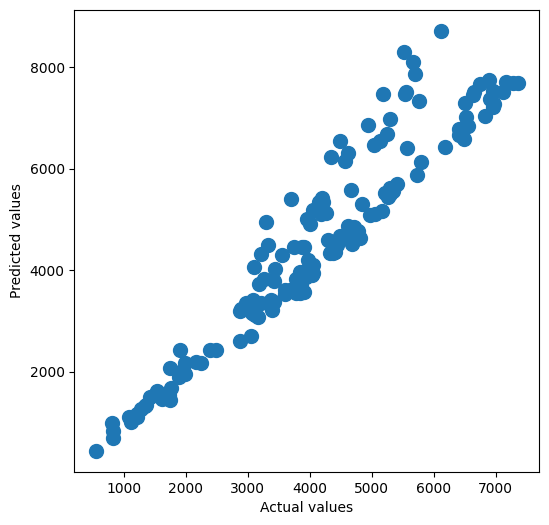

In [37]:
plt.figure(figsize=(6,6))

plt.scatter(y_pred, y_test.values, s=100)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()